## PART 1: Descriptive Statistics and Exploratory Data Analysis

### Initializations

First we import some useful modules for statistics, then do some necessary settings:

In [42]:
import numpy as np
import statsmodels as sts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
sns.set_context('talk')

In [44]:
%matplotlib inline

### Import Data

First we must import the data from file. We use `raw` as identifier of the raw data.

In [45]:
raw = pd.read_csv("G:\Study\Statistics\Thesis\data.csv", index_col='Index')

### Basic Descriptive Statistics

The data are organized in a 2D table, let's look at the head of it.

Here we have already **encode "Gender" with binary number**(1 for male, 0 for female).

In [46]:
raw.columns = ['Gender', 'Height', 'Weight', 'ArmSpan', 'Leglength', 'FeetLength']
print raw.columns

Index([u'Gender', u'Height', u'Weight', u'ArmSpan', u'Leglength',
       u'FeetLength'],
      dtype='object')


In [47]:
raw.head(5)

,Gender,Height,Weight,ArmSpan,Leglength,FeetLength
Index,,,,,,
1,1,185.0,65.0,188.0,102.0,25.1
2,1,173.0,62.0,182.0,93.0,23.5
3,1,175.0,80.3,183.0,107.0,26.5
4,1,182.0,74.3,189.0,114.0,26.0
5,1,173.0,55.7,185.0,107.0,26.0


Look at some simple statistics of each **quantitative** variable: 

In [53]:
raw.loc[:, 'Height': 'FeetLength'].describe()

,Height,Weight,ArmSpan,Leglength,FeetLength
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,172.383333,63.062222,169.740000,95.725556,24.600000
std,7.922394,11.893645,10.506047,7.934076,1.763997
min,155.000000,42.000000,136.600000,77.000000,20.000000
25%,166.500000,55.000000,164.000000,91.000000,23.425000
50%,172.000000,60.250000,169.500000,97.000000,24.500000
75%,178.750000,69.750000,177.000000,101.000000,26.000000
max,187.000000,99.000000,196.000000,119.000000,29.000000


### Distributions of Variables

Then we plot **histgrams** of each varible to see their **sample distribution**.

First let's compare the number of different genders

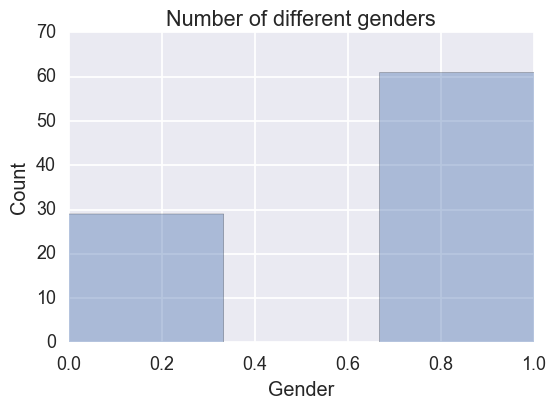

In [67]:
plt.figure()
sns.distplot(raw.loc[:, 'Gender'], kde=False)
plt.title('Number of different genders')
plt.ylabel('Count')

Then we look at distributions of quantitative data. We plot their histgrams, probability density estimations and corresponding data points at the same time:

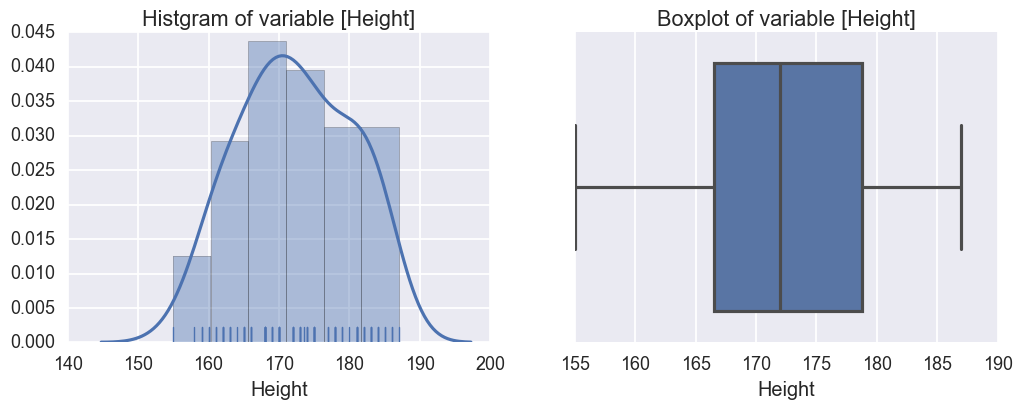

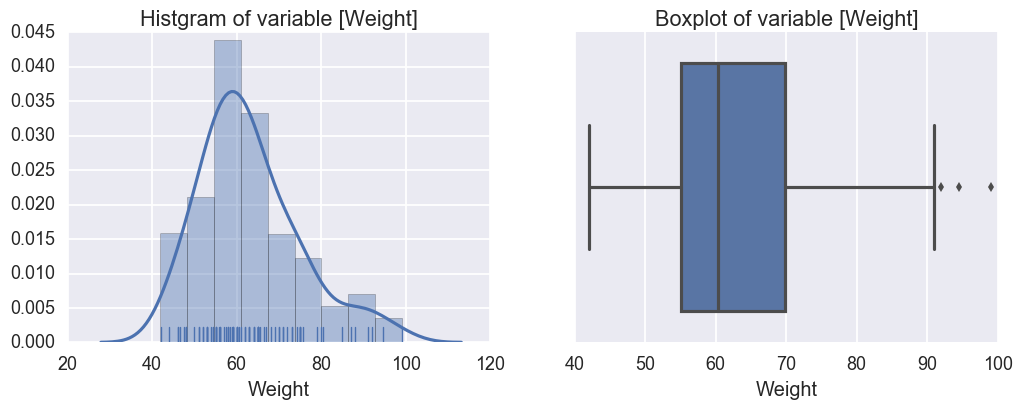

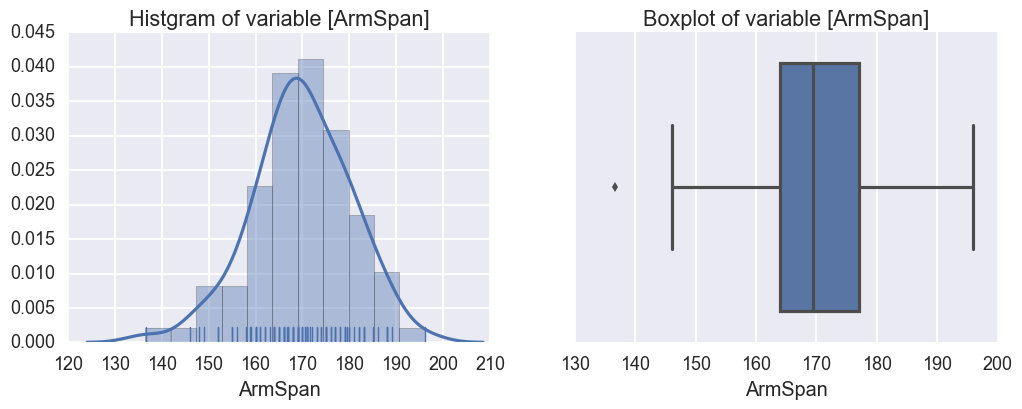

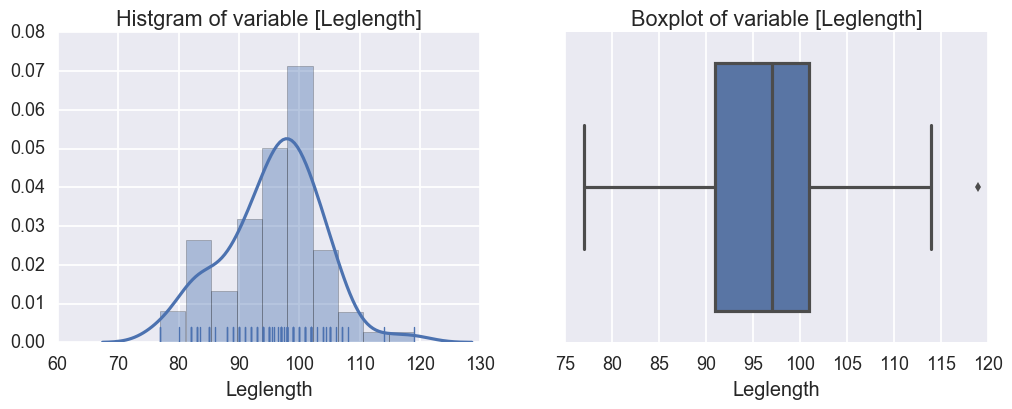

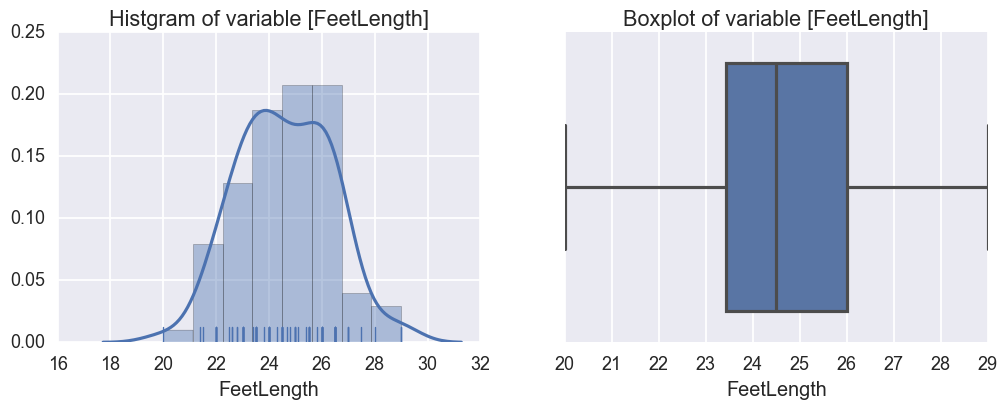

In [79]:
for col, ser in raw.iteritems():
    if col == 'Gender':
        continue
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(ser, rug=True, ax=ax1)
    sns.boxplot(ser, ax=ax2)
    ax1.set_title('Histgram of variable [{0}]'.format(col))
    ax2.set_title('Boxplot of variable [{0}]'.format(col))

According to histgrams, we don't see any ***outliers***, which means our data is relatively "clean".

### Correlations Between Variables

First we look at **pairwise scatter plot** between varibales:

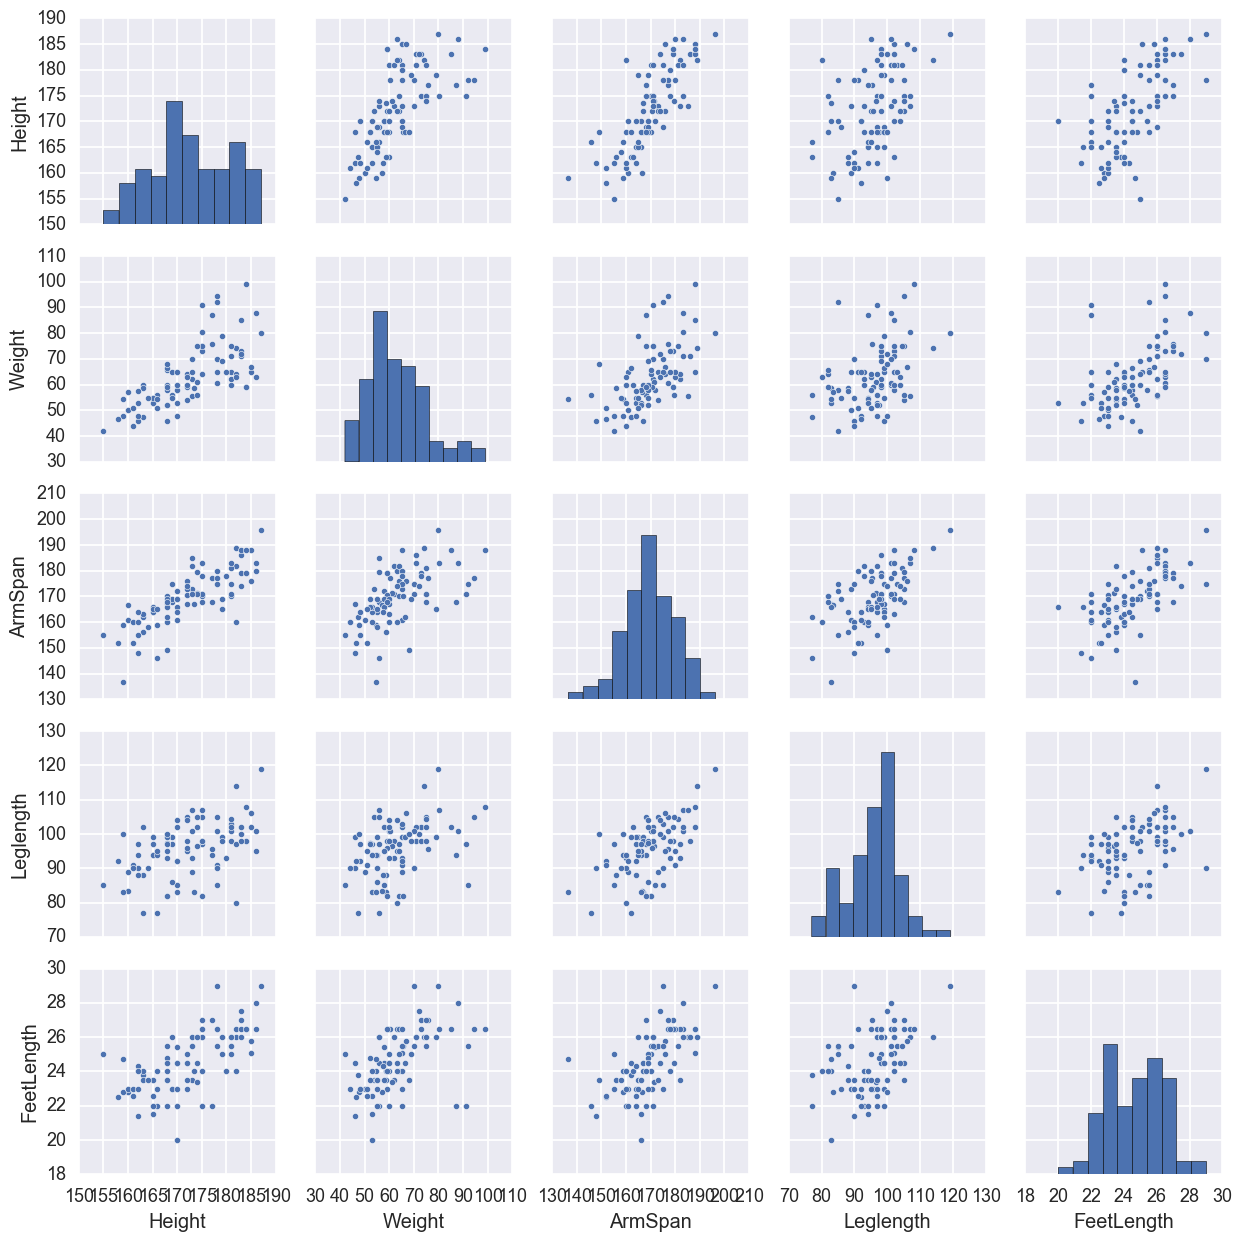

In [62]:
sns.pairplot(raw.loc[:, 'Height':])

All these 4 quantitative varibles (`Height`, `Weight`, `ArmSpan`, `LegLength`) are positively correlated, which is consistent with our intuition.

We would like to see how close are these pairs correlated. Therefore we draw a **heat map of coefficients of correlation**:

In [83]:
raw_corr = raw.loc[:, 'Height': ].corr()
raw_corr

,Height,Weight,ArmSpan,Leglength,FeetLength
Height,1.000000,0.683862,0.794692,0.475839,0.669490
Weight,0.683862,1.000000,0.573615,0.400981,0.530893
ArmSpan,0.794692,0.573615,1.000000,0.570437,0.640298
Leglength,0.475839,0.400981,0.570437,1.000000,0.448429
FeetLength,0.669490,0.530893,0.640298,0.448429,1.000000


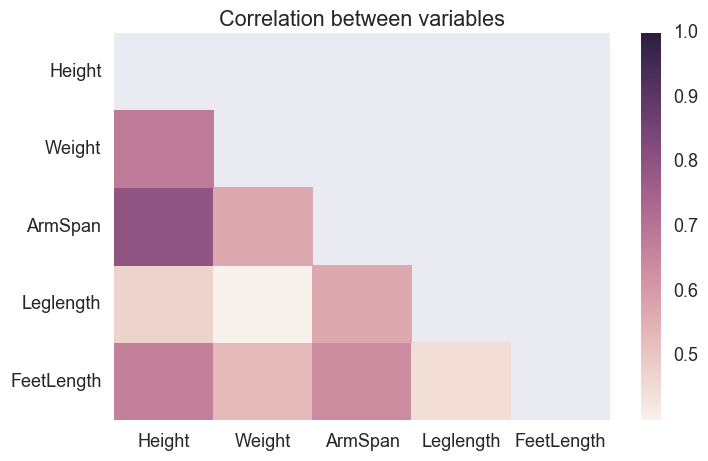

In [94]:
mask = np.zeros_like(raw_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.heatmap(raw_corr, mask=mask, ax=ax)
plt.title('Correlation between variables')

It is indicated by the heatmap above that `ArmSpan` and `Weight` are most closely correlated with `Height`, so we should take a deeper look at their relationship:

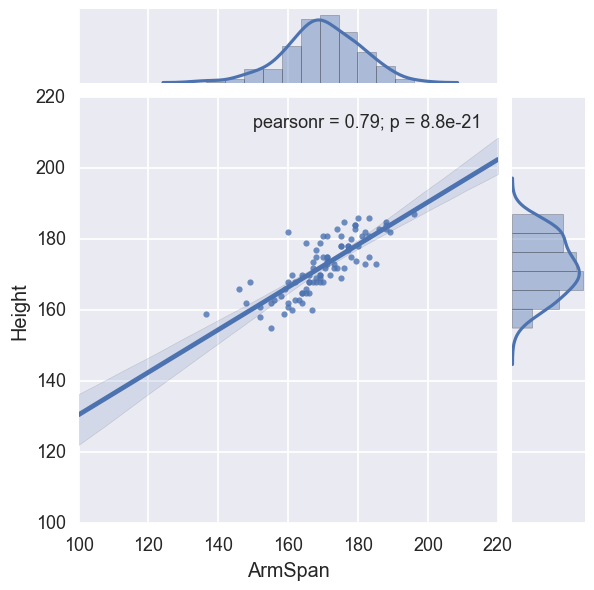

In [70]:
sns.jointplot(data=raw, x='ArmSpan', y='Height', kind='reg')

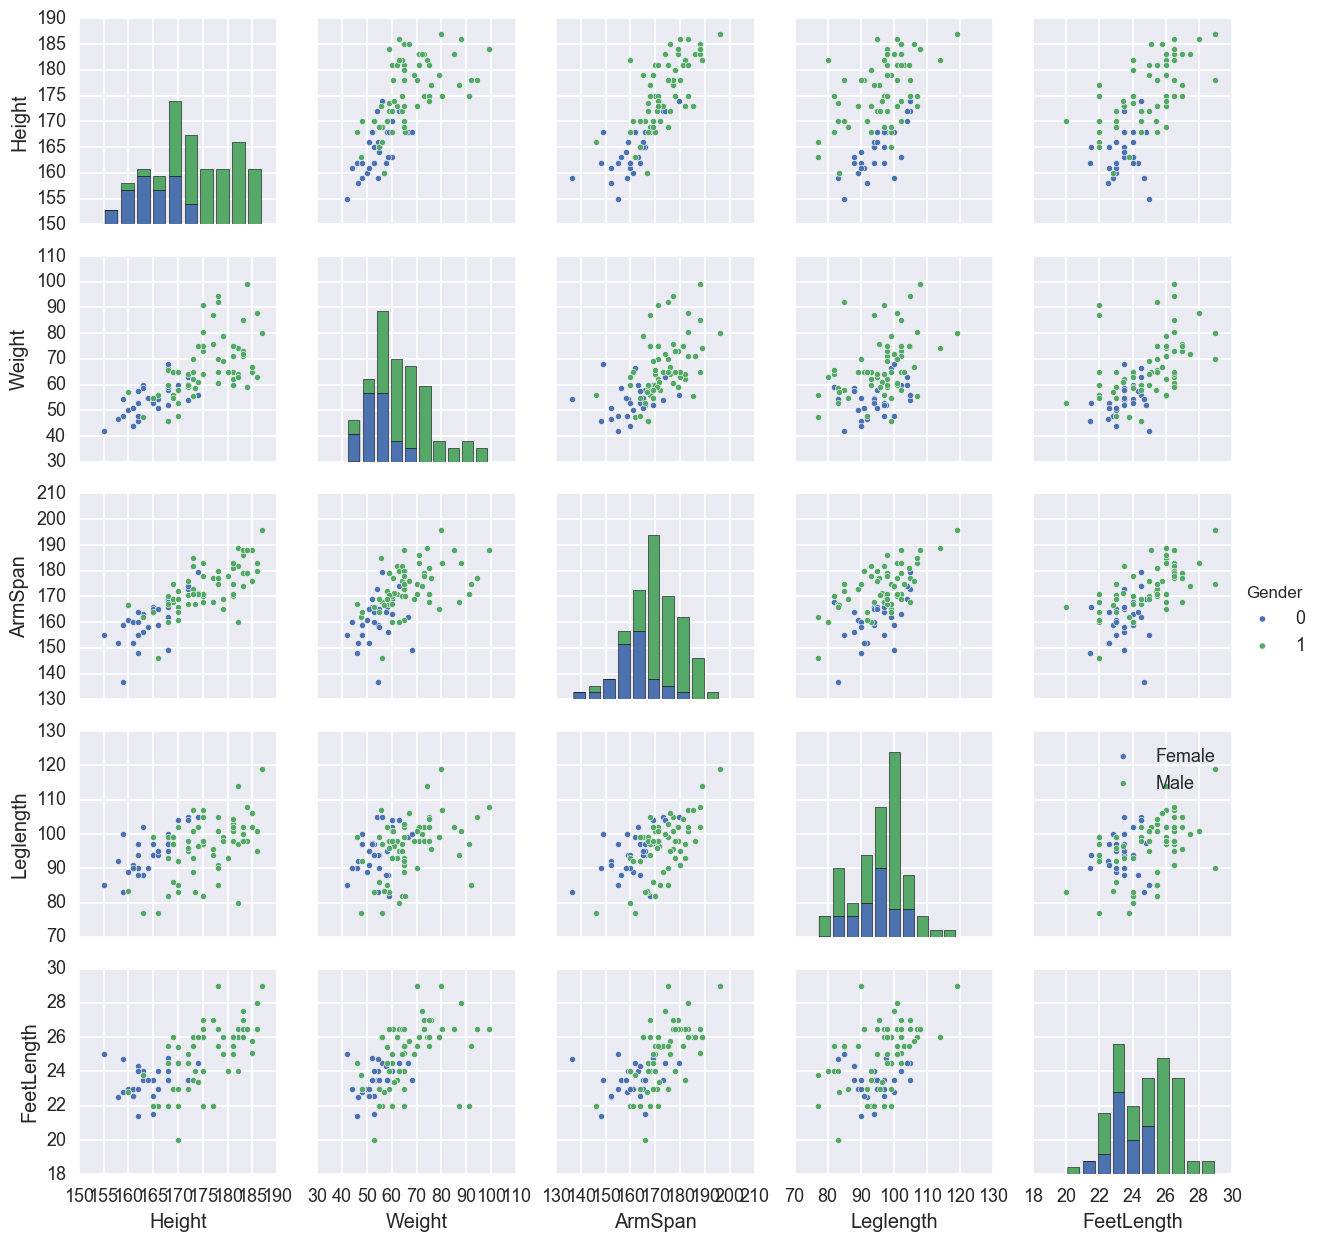

In [81]:
sns.pairplot(raw, hue='Gender', x_vars=raw.columns[1:], y_vars=raw.columns[1:])
plt.legend()

In [ ]:
for col, ser in raw_male.iteritems():
    if col in ['Gender', 'Height/cm']:
        continue
    sns.jointplot(col, 'Height/cm', raw_male, kind='reg')

In [3]:

def CommonStats(arr):
    arr = np.array(arr)
    

    sts_dic = {}
    sts_dic['mean'] = arr.mean()
    sts_dic['var'] = arr.var()
    sts_dic['std'] = np.sqrt(sts_dic['var'])
    sts_dic['var1'] = ((arr - sts_dic['mean'])**2).sum() / (len(arr) - 1)
    sts_dic['std1'] = np.sqrt(sts_dic['var1'])
    sts_dic['m2o'] = (arr**2).mean()
    sts_dic['ran'] = arr.max() - arr.min()

    sts_tb = pd.Series(sts_dic)
    sns.distplot(arr, kde=True, rug=True)
    plt.show()

    return sts_tb


In [ ]:
for col, ser in raw_male.iteritems():
    if col in ['Gender', 'Height/cm']:
        continue
    sns.jointplot(col, 'Height/cm', raw_male, kind='reg')

### Test whether the distributions of different genders are different

In [31]:
raw_male = raw[raw['Gender'] == 1]
raw_female = raw[raw['Gender'] == 0]

In [32]:
print raw_male.head(5)
print raw_female.head(5)


       Gender  Height/cm  Weight/Kg  ArmSpan/cm  LegLength/cm  FeetLength/cm
Index                                                                       
1           1      185.0       65.0       188.0         102.0           25.1
2           1      173.0       62.0       182.0          93.0           23.5
3           1      175.0       80.3       183.0         107.0           26.5
4           1      182.0       74.3       189.0         114.0           26.0
5           1      173.0       55.7       185.0         107.0           26.0
       Gender  Height/cm  Weight/Kg  ArmSpan/cm  LegLength/cm  FeetLength/cm
Index                                                                       
62          0      159.0       47.9       158.8         100.0           22.8
63          0      172.0       54.0       173.0         105.0           23.5
64          0      163.0       60.0       163.0         102.0           24.0
65          0      165.0       53.0       164.0          97.0           22.6

## PART 2: Regression Analysis